In [1]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection

def lorenz_attractor(dt, num_steps, sigma=10, rho=28, beta=2.667):
    # Initialize the arrays for X, Y, Z
    xs, ys, zs = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    xs[0], ys[0], zs[0] = 0., 1., 1.05  # Initial conditions

    # Step through time, updating the x, y, z
    for i in range(num_steps - 1):
        x_dot = sigma * (ys[i] - xs[i])
        y_dot = xs[i] * (rho - zs[i]) - ys[i]
        z_dot = xs[i] * ys[i] - beta * zs[i]
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    
    return xs, ys, zs

def four_wing_attractor(dt, num_steps, a=0.2, b=0.01, c=-0.4):
    # Initialize the arrays for X, Y, Z
    xs, ys, zs = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    xs[0], ys[0], zs[0] = 0.1, 0.1, 0.1  # Initial conditions

    # Step through time, updating the x, y, z
    for i in range(num_steps - 1):
        x_dot = a * xs[i] + ys[i] * zs[i]
        y_dot = b * xs[i] + c * ys[i] - xs[i] * zs[i]
        z_dot = -zs[i] - xs[i] * ys[i]
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    
    return xs, ys, zs

def langford_attractor(dt, num_steps, a=0.95, b=0.7, c=0.6, d=3.5, e=0.25, f=0.1):
    # Initialize the arrays for X, Y, Z
    xs, ys, zs = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    xs[0], ys[0], zs[0] = 0.1, 0.1, 0.1  # Initial conditions

    # Step through time, updating the x, y, z
    for i in range(num_steps - 1):
        x_dot = (zs[i] - b) * xs[i] - d * ys[i]
        y_dot = d * xs[i] + (zs[i] - b) * ys[i]
        z_dot = c + a * zs[i] - zs[i]**3 / 3 - (xs[i]**2 + ys[i]**2) * (1 + e * zs[i]) + f * zs[i] * xs[i]**3
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    
    return xs, ys, zs

def dadras_attractor(dt, num_steps, a=3, b=2.7, c=1.7, d=2, e=9):
    # Initialize the arrays for X, Y, Z
    xs, ys, zs = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    xs[0], ys[0], zs[0] = 1.0, 1.0, 1.0  # Initial conditions

    # Step through time, updating the x, y, z
    for i in range(num_steps - 1):
        x_dot = ys[i] - a * xs[i] + b * ys[i] * zs[i]
        y_dot = c * ys[i] - xs[i] * zs[i] + zs[i]
        z_dot = d * xs[i] * ys[i] - e * zs[i]
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    
    return xs, ys, zs

In [2]:
# Parameters
dt = 0.01
num_steps = 15000

# Generate the attractor
# xs, ys, zs = lorenz_attractor(dt, num_steps)
# xs, ys, zs = four_wing_attractor(dt, num_steps)
# xs, ys, zs = langford_attractor(dt, num_steps)
xs, ys, zs = dadras_attractor(dt, num_steps)

colors = np.arange(len(xs))

fig = go.Figure(data=[go.Scatter3d(
    x=xs, y=ys, z=zs,
    mode='lines',
    line=dict(
        color=colors,
        colorscale='YlOrBr',
        # color="#5CA1FF",
        width=2,
        showscale=False  # Optionally add a color scale bar
    )
)])
fig.update_layout(
    title='Custom Attractor',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(l=0, r=0, b=0, t=30),
    scene=dict(
        xaxis=dict(showbackground=False, showticklabels=False, zeroline=False, showgrid=False, visible=False),
        yaxis=dict(showbackground=False, showticklabels=False, zeroline=False, showgrid=False, visible=False),
        zaxis=dict(showbackground=False, showticklabels=False, zeroline=False, showgrid=False, visible=False)
    )
)
fig.show()


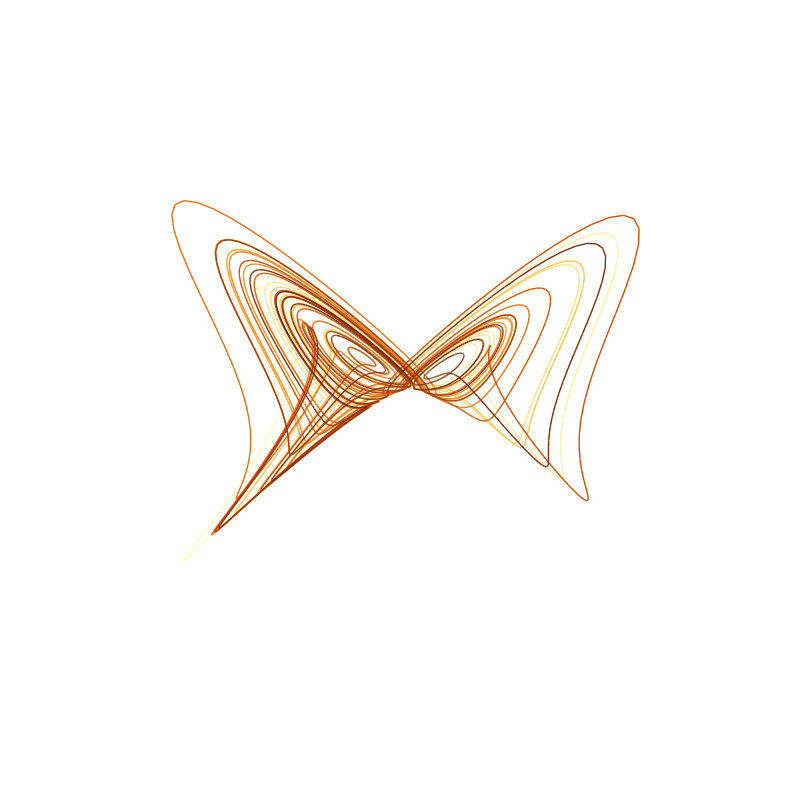

In [6]:
# Parameters
dt = 0.01
num_steps = 15000

# Generate the attractor
xxs, yys, zzs = dadras_attractor(dt, num_steps)

# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 10), facecolor='none', edgecolor='none')  # Figure with transparent background
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor((0.0, 0.0, 0.0, 0.0))  # Axis background transparent

# Create a line collection for the trajectory with gradient
points = np.array([xxs, yys, zzs]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = Line3DCollection(segments, cmap='YlOrBr', linewidths=1)
lc.set_array(np.linspace(0, 1, num_steps))
ax.add_collection3d(lc)

# Hide the axes
ax.set_xlim([min(xxs), max(xxs)])
ax.set_ylim([min(yys), max(yys)])
ax.set_zlim([min(zzs), max(zzs)])
ax.axis('off')

# Define the rotation of the view
elevation = 0  # degrees above the x-y plane
azimuth = 80   # degrees around the z-axis 80
ax.view_init(elev=elevation, azim=azimuth)

# Show plot
plt.show()

# Optionally, save the figure with transparent background
fig.savefig('dadras_attractor.png', transparent=True, dpi=300)

KeyboardInterrupt: 

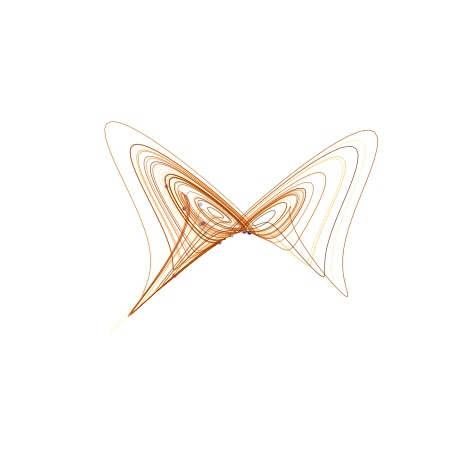

In [4]:
def dadras_attractor_trajs(initial_conditions, dt, num_steps, a=3, b=2.7, c=1.7, d=2, e=9):
    xs, ys, zs = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    xs[0], ys[0], zs[0] = initial_conditions
    for i in range(num_steps - 1):
        x_dot = ys[i] - a * xs[i] + b * ys[i] * zs[i]
        y_dot = c * ys[i] - xs[i] * zs[i] + zs[i]
        z_dot = d * xs[i] * ys[i] - e * zs[i]
        xs[i + 1] = xs[i] + x_dot * dt
        ys[i + 1] = ys[i] + y_dot * dt
        zs[i + 1] = zs[i] + z_dot * dt
    return xs, ys, zs

def down_sample(xs, ys, zs, factor=10):
    return xs[::factor], ys[::factor], zs[::factor]

def compute_trajectories(num_trajectories, num_steps):
    trajectories = []
    for _ in range(num_trajectories):
        initial_conditions = np.random.rand(3) * 3 - 2
        traj = dadras_attractor_trajs(initial_conditions, dt=0.01, num_steps=num_steps)
        # traj = down_sample(*traj, factor=10)
        trajectories.append(traj)
    return trajectories

# Number of trajectories and steps
num_trajectories = 20
num_steps = 2000
trajectories = compute_trajectories(num_trajectories, num_steps)

# Set up the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([min(xs), max(xs)])
ax.set_ylim([min(ys), max(ys)])
ax.set_zlim([min(zs), max(zs)])
ax.grid(False)
ax.axis('off')

# Create a line collection for the trajectory
points = np.array([xxs, yys, zzs]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = Line3DCollection(segments, cmap='YlOrBr', linewidths=0.4)  # Adjust line width here
lc.set_array(np.linspace(0, 1, len(segments)))
ax.add_collection3d(lc)

# Purple colormap
colors = plt.cm.Purples(np.linspace(0, 1, num_trajectories))
# Initialize points for animation
markers = [ax.plot([traj[0][0]], [traj[1][0]], [traj[2][0]], 'o', markersize=2, color=colors[i])[0] for i, traj in enumerate(trajectories)]

# Define the rotation of the view
elevation = 0  # degrees above the x-y plane
azimuth = 80   # degrees around the z-axis 80
ax.view_init(elev=elevation, azim=azimuth)

# tight layout
plt.tight_layout()

# Update function for animation
def update(num, trajectories, markers):
    for marker, traj in zip(markers, trajectories):
        marker.set_data([traj[0][num]], [traj[1][num]])
        marker.set_3d_properties([traj[2][num]])
    return markers

# Using np.arange to create a sequence of frames to skip every second frame
frame_sequence = np.arange(len(trajectories[0][0])//2, len(trajectories[0][0]), 3)  # Skip every second frame

# Creating the animation with modified frame sequence
ani = FuncAnimation(fig, update, frames=frame_sequence, fargs=(trajectories, markers), interval=20, blit=True)

# Save animation as mp4, with high resolution
ani.save('multiple_dadras_trajectories.mp4', writer='ffmpeg', fps=30, dpi=300)

plt.show()
